Name:Vishakha Shelke
Topic:Time_series_EDA



#Trying to read data using datareader

In [ ]:
!pip install pandas-datareader

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
d=pdr.get_data_yahoo('TSLA')

AttributeError: 'NoneType' object has no attribute 'group'

#reading data using yf function

In [ ]:
import yfinance as yf
#The yfinance library is used to fetch financial data from Yahoo Finance.
# Fetch data for Tesla (TSLA)
ticker = "TSLA"
#ticker is a string variable that stores the stock symbol for Tesla, which is "TSLA"
data = yf.download(ticker)

print(data.head())


[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600
2024-07-09,251.000000,265.609985,250.300003,262.329987,262.329987,160210900
2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400
2024-07-11,263.299988,271.000000,239.649994,241.029999,241.029999,221707300
2024-07-12,235.800003,251.839996,233.089996,248.229996,248.229996,155694400


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600
2024-07-09,251.000000,265.609985,250.300003,262.329987,262.329987,160210900
2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400


<Axes: xlabel='Date'>

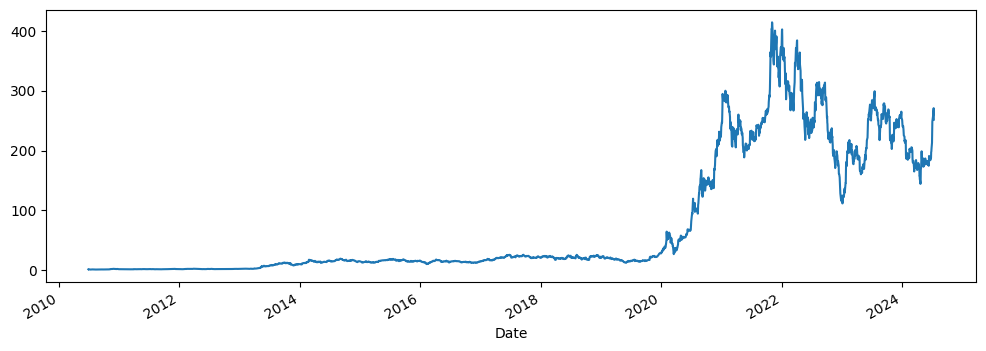

In [ ]:
#This plot will show the highest prices of Tesla stock over time
data['High'].plot(figsize=(12,4))


*   plot shows an upward trend, it indicates that the highest prices of Tesla stock have been increasing over time

<Axes: xlabel='Date'>

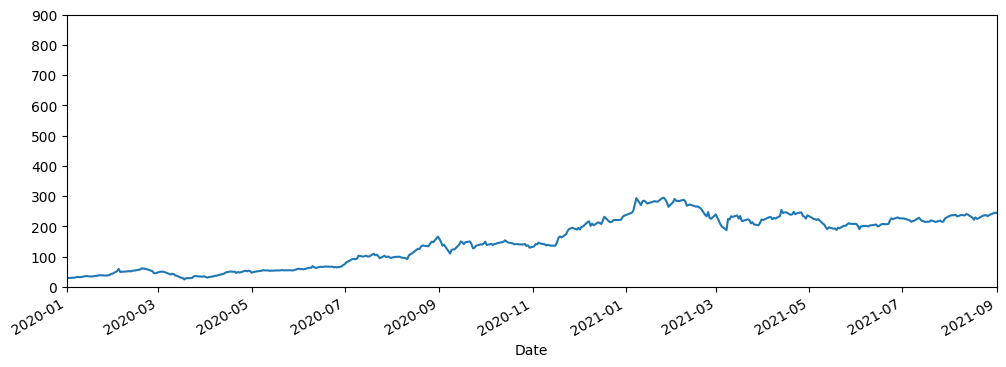

In [ ]:
data['Close'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))




* This plot shows the closing prices of Tesla stock over the specified date range (from January 1, 2020, to September 1, 2021).


* If the plot shows an upward trend, it indicates that Tesla's closing prices increased over the specified period.





In [ ]:
#Date Time Index:
data=data.reset_index()
#By default, when you download historical stock data using yfinance, the DataFrame data has the dates as its index.
#reset_index() moves the current index (dates) back to the DataFrame as a regular column and resets the index to the default integer index (0, 1, 2, ...).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533 entries, 0 to 3532
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3533 non-null   datetime64[ns]
 1   Open       3533 non-null   float64       
 2   High       3533 non-null   float64       
 3   Low        3533 non-null   float64       
 4   Close      3533 non-null   float64       
 5   Adj Close  3533 non-null   float64       
 6   Volume     3533 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 193.3 KB


In [ ]:
data=data.set_index('Date',drop=True)


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


#Time Resampling

In [ ]:
data.resample(rule='A').min()
#The rule='A' parameter specifies that the resampling should be done on an annual basis.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


Minimum Values of stock every year




In [ ]:
data.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


Minimum Values of stock every year


<Axes: xlabel='Date'>

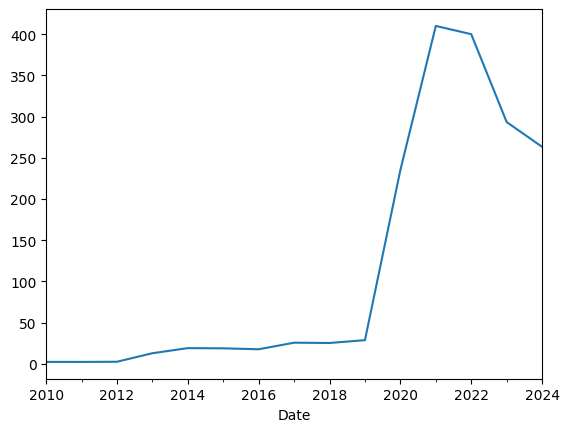

In [ ]:
#year end changes
data.resample(rule='A').max()['Close'].plot()


<Axes: xlabel='Date'>

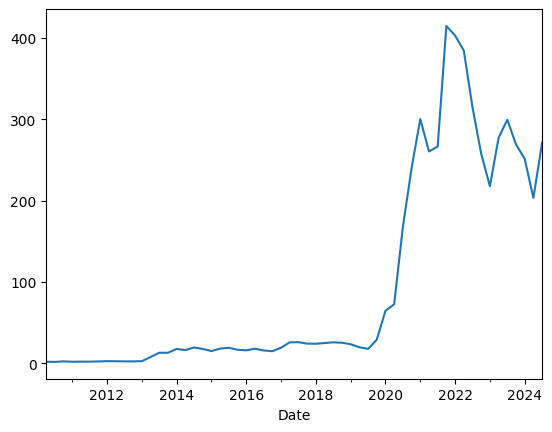

In [ ]:
##quaterly end frequency
data.resample(rule='QS').max()['High'].plot()


<Axes: xlabel='Date'>

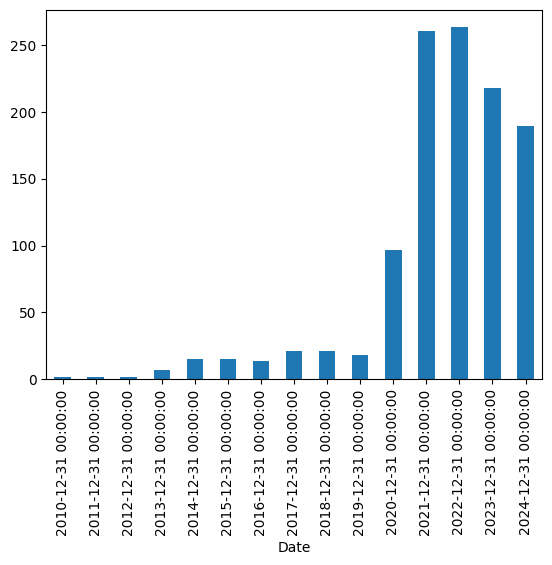

In [ ]:
data['Close'].resample(rule='A').mean().plot(kind='bar')


In [ ]:
data['Close'].rolling(11).max().head(20)


Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13         NaN
2010-07-14    1.592667
2010-07-15    1.588667
2010-07-16    1.464000
2010-07-19    1.460667
2010-07-20    1.460667
2010-07-21    1.460667
2010-07-22    1.460667
2010-07-23    1.460667
2010-07-26    1.460667
2010-07-27    1.460667
Name: Close, dtype: float64

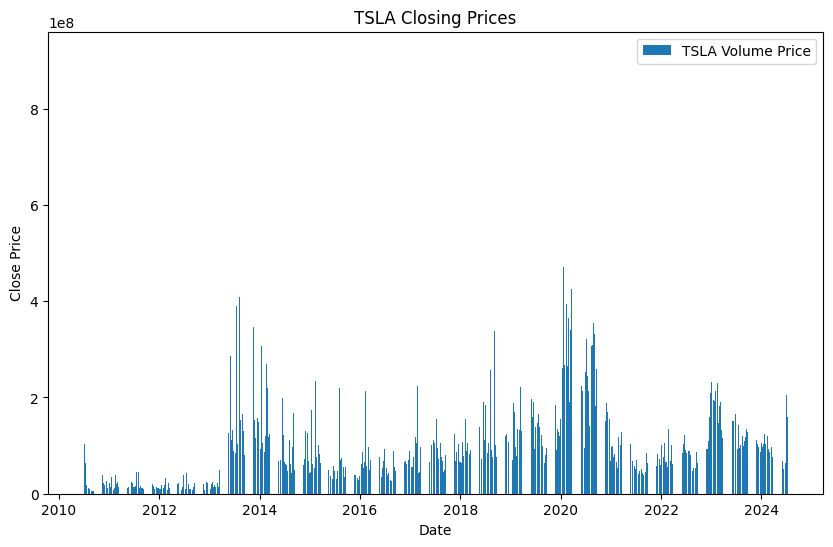

In [ ]:
#Bar chart
plt.figure(figsize=(10, 6))
plt.bar(data.index, data['Volume'], label='TSLA Volume Price')
plt.title('TSLA Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

Get the maximum price of the share from 2017 to 2022


In [ ]:
mp=data['High'].loc['2017-01-01':'2022-12-31'].resample('A').max()
mp.max()


414.4966735839844

Which is the date of the highest price of the stock?



In [ ]:
max_price_date = data['High'].idxmax()
max_price = data['High'].max()
print("Maximum Price:", max_price)
print("Date:", max_price_date)

Maximum Price: 414.4966735839844
Date: 2021-11-04 00:00:00


Which is the date of the lowest price of the stock?


In [ ]:
min_price_date = data['High'].idxmin()
min_price = data['High'].min()
print("Minimum Price:", min_price)
print("Date:", min_price_date)

Minimum Price: 1.108667016029358
Date: 2010-07-07 00:00:00


#Airpassangers Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [ ]:
df=pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [ ]:
df.isnull().sum()


Month                      0
Thousands of Passengers    1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    145 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [ ]:
df['Month']=pd.to_datetime(df['Month'])


In [ ]:
df.set_index('Month',inplace=True)


<Axes: xlabel='Month'>

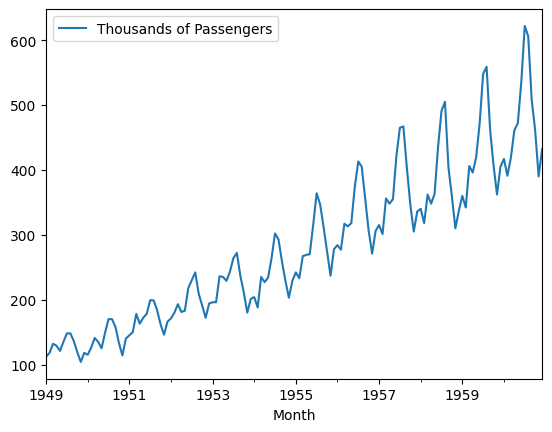

In [ ]:
df.plot()

plot shows increasing number of passangers over the years

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Thousands of Passengers'])
#1st value - ADF Statistic
#2nd value - p-value

In [ ]:
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


The time series is likely non-stationary.\
The ADF statistic of 0.8153688792060498 is greater than the critical values at all levels of significance (1%, 5%, and 10%). This indicates that the time series is likely non-stationary.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
df['Passengers First Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)


In [ ]:
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

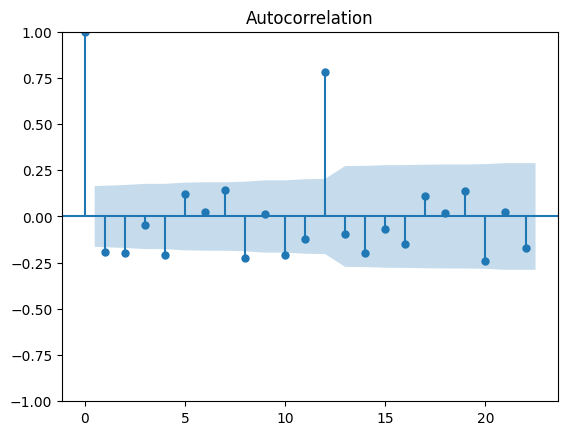

In [ ]:
acf = plot_acf(df["Passengers Second Difference"].dropna())


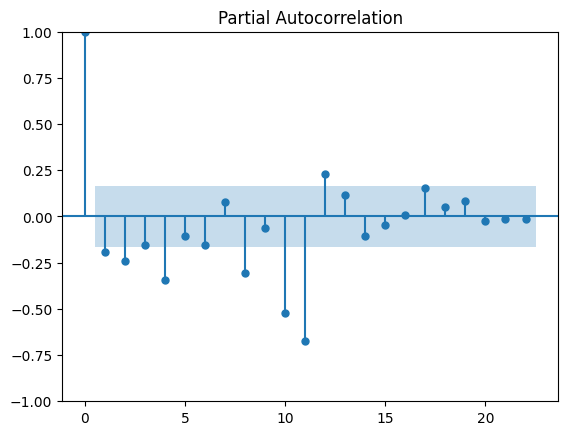

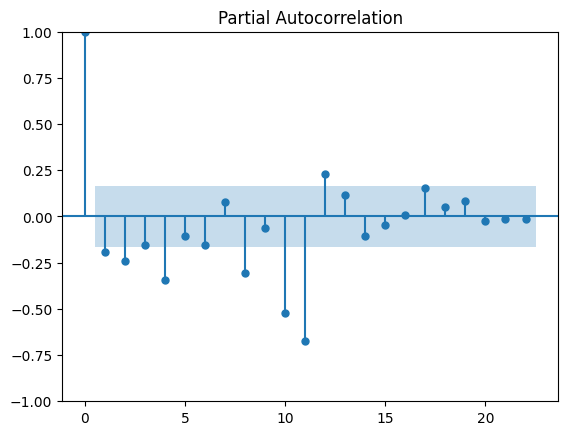

In [ ]:
plot_pacf(df["Passengers Second Difference"].dropna())